# DATA ANALYSIS AND VISUALIZATION OF CRIMES REPORTED IN LOS ANGLES FROM JAN-SEPT 2023

In [1]:
!Python --version

Python 3.11.5


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 (data source)
d=pd.read_excel(r"D:\Poojitha\601\JAN-SEP crime rate(2023).xlsx")
#shows the stastical measures of each numerical column
display(d.describe())

,DR_NO,Date Rptd,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,5.846800e+04,58468,58468.000000,58468.000000,58468.000000,58468.000000,58468.000000,58468.000000,58468.000000,19209.000000,58467.000000,3773.000000,113.000000,1.0,58468.000000,58468.000000
mean,2.310760e+08,2023-05-03 17:52:36.680577280,1308.265547,10.675515,1114.328214,1.434699,493.462732,29.313368,321.806612,366.291686,493.248619,963.829049,979.716814,998.0,31.720475,-110.181496
min,2.108117e+08,2023-01-01 00:00:00,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,220.000000,310.000000,998.0,0.000000,-118.667600
25%,2.305132e+08,2023-03-02 00:00:00,830.000000,5.000000,567.000000,1.000000,331.000000,0.000000,102.000000,312.000000,331.000000,998.000000,998.000000,998.0,33.993200,-118.419700
50%,2.311086e+08,2023-05-04 00:00:00,1400.000000,11.000000,1142.000000,1.000000,440.000000,30.000000,221.000000,400.000000,440.000000,998.000000,998.000000,998.0,34.052600,-118.308950
75%,2.316051e+08,2023-07-07 00:00:00,1839.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.0,34.153600,-118.264200
max,2.399165e+08,2023-09-10 00:00:00,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,972.000000,516.000000,956.000000,999.000000,998.000000,998.0,34.327400,0.000000
std,6.327436e+05,NaN,659.499438,6.125072,612.342515,0.495722,204.440236,21.882626,218.259612,124.195005,204.259524,101.771005,75.915422,NaN,8.639385,30.006895


# Data Cleaning and Description

In [4]:
display(d.shape)

(58468, 28)

In [5]:
display(d.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
display(d.nunique())
#display(d['AREA'].nunique().sum())

DR_NO             58468
Date Rptd            90
DATE OCC            809
TIME OCC           1422
AREA                 21
AREA NAME            21
Rpt Dist No        1138
Part 1-2              2
Crm Cd              121
Crm Cd Desc         121
Mocodes           23770
Vict Age            101
Vict Sex              4
Vict Descent         19
Premis Cd           261
Premis Desc         258
Weapon Used Cd       69
Weapon Desc          69
Status                6
Status Desc           6
Crm Cd 1            121
Crm Cd 2             63
Crm Cd 3              8
Crm Cd 4              1
LOCATION          22781
Cross Street       2369
LAT                4180
LON                4125
dtype: int64

In [7]:
display(d.dtypes)

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC                  object
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                  int64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [8]:
d.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            8124
Vict Age              0
Vict Sex           7666
Vict Descent       7666
Premis Cd             0
Premis Desc          59
Weapon Used Cd    39259
Weapon Desc       39259
Status                0
Status Desc           0
Crm Cd 1              1
Crm Cd 2          54695
Crm Cd 3          58355
Crm Cd 4          58467
LOCATION              0
Cross Street      50547
LAT                   0
LON                   0
dtype: int64

In [9]:
d["Mocodes"].fillna("X", inplace=True)
subset = d.iloc[:, 6:12].head(10)
display(subset)

,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age
0,1391,2,354,THEFT OF IDENTITY,100,19
1,1075,1,510,VEHICLE - STOLEN,X,0
2,1391,2,354,THEFT OF IDENTITY,100,22
3,519,1,510,VEHICLE - STOLEN,X,0
4,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,7
5,1231,2,354,THEFT OF IDENTITY,0100 0922,21
6,1029,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1822 0344 1300,30
7,1266,2,354,THEFT OF IDENTITY,0100 0930 0929 1822,27
8,2196,2,649,DOCUMENT FORGERY / STOLEN FELONY,1822,48
9,1391,2,354,THEFT OF IDENTITY,100,26


In [10]:
#use dictionaries for filling in blank spaces of multiple columns
replacement_values = {
    'Vict Sex'    : 'X',  # Replace null values in 'Vict Sex' column  with 'X'
    'Vict Descent': "X",        
    'Weapon Desc' : "X",
    'Cross Street': "X",
}

# Use fillna to fill null values in multiple columns at once
d.fillna(replacement_values, inplace=True)
subset1=d.iloc[:, 15:22]
"""Save the modified DataFrame back to the Excel file if needed
d.to_excel('modified_excel_file.xlsx', index=False)"""

# Display the modified DataFrame
display(subset1)

,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2
0,CYBERSPACE,NaN,X,IC,Invest Cont,354.0,NaN
1,STREET,NaN,X,IC,Invest Cont,510.0,NaN
2,CYBERSPACE,NaN,X,IC,Invest Cont,354.0,NaN
3,PARKING LOT,NaN,X,IC,Invest Cont,510.0,NaN
4,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,860.0
...,...,...,...,...,...,...,...
58463,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,X,IC,Invest Cont,354.0,NaN
58464,HEALTH SPA/GYM,NaN,X,IC,Invest Cont,341.0,NaN
58465,ELEMENTARY SCHOOL,NaN,X,IC,Invest Cont,745.0,NaN
58466,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,X,IC,Invest Cont,352.0,NaN


In [11]:
d["Premis Desc"].fillna("X", inplace=True)
subset3 = d.iloc[:, 6:12].head(10)
display(subset3)

,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age
0,1391,2,354,THEFT OF IDENTITY,100,19
1,1075,1,510,VEHICLE - STOLEN,X,0
2,1391,2,354,THEFT OF IDENTITY,100,22
3,519,1,510,VEHICLE - STOLEN,X,0
4,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,7
5,1231,2,354,THEFT OF IDENTITY,0100 0922,21
6,1029,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1822 0344 1300,30
7,1266,2,354,THEFT OF IDENTITY,0100 0930 0929 1822,27
8,2196,2,649,DOCUMENT FORGERY / STOLEN FELONY,1822,48
9,1391,2,354,THEFT OF IDENTITY,100,26


In [12]:
replacement_number={
    'Weapon Used Cd': 0,
    'Crm Cd 1'      : 0,
    'Crm Cd 2'      : 0,
    'Crm Cd 3'      : 0,
    'Crm Cd 4'      : 0
}

d.fillna(replacement_number,inplace=True)
subset2=d.iloc[:,20:26]
display(subset2)

,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street
0,354.0,0.0,0.0,0.0,6400 S BROADWAY,X
1,510.0,0.0,0.0,0.0,NESTLE,VENTURA
2,354.0,0.0,0.0,0.0,6600 S BROADWAY,X
3,510.0,0.0,0.0,0.0,1400 COIL AV,X
4,812.0,860.0,0.0,0.0,900 N MARIPOSA AV,X
...,...,...,...,...,...,...
58463,354.0,0.0,0.0,0.0,2000 S HOLT AV,X
58464,341.0,0.0,0.0,0.0,10200 SANTA MONICA BL,X
58465,745.0,0.0,0.0,0.0,2000 MERTON AV,X
58466,352.0,0.0,0.0,0.0,500 S MAIN ST,X


In [13]:
zeroes=d["Vict Age"]==0
display_zeroes= d.loc[zeroes].iloc[:,[0,11]]#displays only 1st & 12th column
display(display_zeroes.head(10))
print("There are",zeroes.sum(),"cases in which victim age is unknown")

,DR_NO,Vict Age
1,231013398,0
3,230505482,0
40,231207841,0
44,231207678,0
83,231809815,0
92,231008957,0
96,231109634,0
107,231109831,0
110,231109830,0
141,230812755,0


There are 15064 cases in which victim age is unknown


In [14]:
d.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [15]:
d['Vict Age']=d['Vict Age'].replace(-1,0)
d['Vict Age']=d['Vict Age'].replace(-2,0)

In [16]:
nonzeroes=d["Vict Age"]!=0
display_nonzeroes= d.loc[nonzeroes].iloc[:,[0,11]]#displays only 1st & 12th column
display(display_nonzeroes.head(10))
print("There are",nonzeroes.sum(),"cases in which victim age is known")

,DR_NO,Vict Age
0,231308569,19
2,231307252,22
4,230204214,7
5,231204292,21
6,231004261,30
7,231204321,27
8,232104115,48
9,231304299,26
10,230104553,43
11,230304296,33


There are 43387 cases in which victim age is known


In [17]:
'''this part gives the mode of each and every column'''
non_zero_values=d[d["Vict Age"]!=0]
frequent_values=non_zero_values.mode().iloc[0]
display(frequent_values)

DR_NO                                           210811708
Date Rptd                             2023-03-02 00:00:00
DATE OCC                              2023-02-02 00:00:00
TIME OCC                                           1200.0
AREA                                                  1.0
AREA NAME                                         Central
Rpt Dist No                                        1494.0
Part 1-2                                              2.0
Crm Cd                                              354.0
Crm Cd Desc                             THEFT OF IDENTITY
Mocodes                                               344
Vict Age                                             31.0
Vict Sex                                                F
Vict Descent                                            H
Premis Cd                                           501.0
Premis Desc                        SINGLE FAMILY DWELLING
Weapon Used Cd                                        0.0
Weapon Desc   

In [18]:
'''this part only gives the mode of "Vict Age " column'''
non_zero_values_1 = d["Vict Age"][d["Vict Age"] != 0]

# Calculate the mode of non-zero values
mode_non_zero = non_zero_values_1.mode().iloc[0]


print("most of the crimes are happening for this age group:",mode_non_zero)

most of the crimes are happening for this age group: 31


In [19]:
#counting the no of times each unique value repeats under the column 'Vict Age'
v_counts= d['Vict Age'].value_counts()#value_counts() counts the no of times a unique value is repeated under the described 
#column in this case it counts the no of time each unique value is repeated in vict Age column

display(v_counts.head(10))

Vict Age
0     15081
31     1354
29     1306
30     1287
32     1275
35     1262
33     1258
27     1255
28     1245
34     1237
Name: count, dtype: int64

In [20]:
#Dropping down the unknowns
exclude_value=0
v_counts= d['Vict Age'].value_counts()
display_values= v_counts[v_counts.index!=exclude_value].head(10)
display(display_values)

Vict Age
31    1354
29    1306
30    1287
32    1275
35    1262
33    1258
27    1255
28    1245
34    1237
22    1218
Name: count, dtype: int64

In [21]:
#this shows the unique values after  data cleaning
display(d.nunique())

DR_NO             58468
Date Rptd            90
DATE OCC            809
TIME OCC           1422
AREA                 21
AREA NAME            21
Rpt Dist No        1138
Part 1-2              2
Crm Cd              121
Crm Cd Desc         121
Mocodes           23771
Vict Age             99
Vict Sex              4
Vict Descent         19
Premis Cd           261
Premis Desc         259
Weapon Used Cd       70
Weapon Desc          70
Status                6
Status Desc           6
Crm Cd 1            122
Crm Cd 2             64
Crm Cd 3              9
Crm Cd 4              2
LOCATION          22781
Cross Street       2370
LAT                4180
LON                4125
dtype: int64

# FINDING OUT TOP 10 CRIMES COMMITED 

In [22]:
# Calculate the value counts for the column
value_counts = d['Crm Cd'].value_counts()


# Sort the value counts in descending order
sorted_counts = value_counts.sort_values(ascending=False)

# Select the top 10 values
top_10_values = sorted_counts.head(10)
print(top_10_values)
top_10_df = pd.DataFrame({'Top_10_crime codes': top_10_values.index})
print(top_10_df)



Crm Cd
354    6103
510    5845
624    4615
310    3398
740    3236
230    3153
330    3152
626    2641
440    2576
331    2277
Name: count, dtype: int64
   Top_10_crime codes
0                 354
1                 510
2                 624
3                 310
4                 740
5                 230
6                 330
7                 626
8                 440
9                 331


# CRIME HOTSPOTS - ANALYSIS AND VISUALIZATION

In [23]:
values = [354, 510, 624, 310, 740, 230, 330, 626, 440, 331]

# Create a new DataFrame to store the extracted values
extracted_df = pd.DataFrame()

# Iterate through the values and extract corresponding values from 'AREA'
for value in values:
    extracted_values = d[d['Crm Cd'] == value]['AREA'].reset_index(drop=True)
    extracted_df['SearchValue_' + str(value)] = extracted_values

# Display the extracted values in the new DataFrame
print(extracted_df)
print(extracted_values)
print(extracted_values.unique())

      SearchValue_354  SearchValue_510  SearchValue_624  SearchValue_310  \
0                  13             10.0              3.0             19.0   
1                  13              5.0             21.0              6.0   
2                  12              8.0              8.0             14.0   
3                  12             19.0             20.0              4.0   
4                  13             14.0              9.0              6.0   
...               ...              ...              ...              ...   
6098                9              NaN              NaN              NaN   
6099               12              NaN              NaN              NaN   
6100               13              NaN              NaN              NaN   
6101               13              NaN              NaN              NaN   
6102                8              NaN              NaN              NaN   

      SearchValue_740  SearchValue_230  SearchValue_330  SearchValue_626  \
0          

SearchValue_354    18.0
SearchValue_510    12.0
SearchValue_624     1.0
SearchValue_310    17.0
SearchValue_740     1.0
SearchValue_230     1.0
SearchValue_330     1.0
SearchValue_626    12.0
SearchValue_440    14.0
SearchValue_331    11.0
Name: 0, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


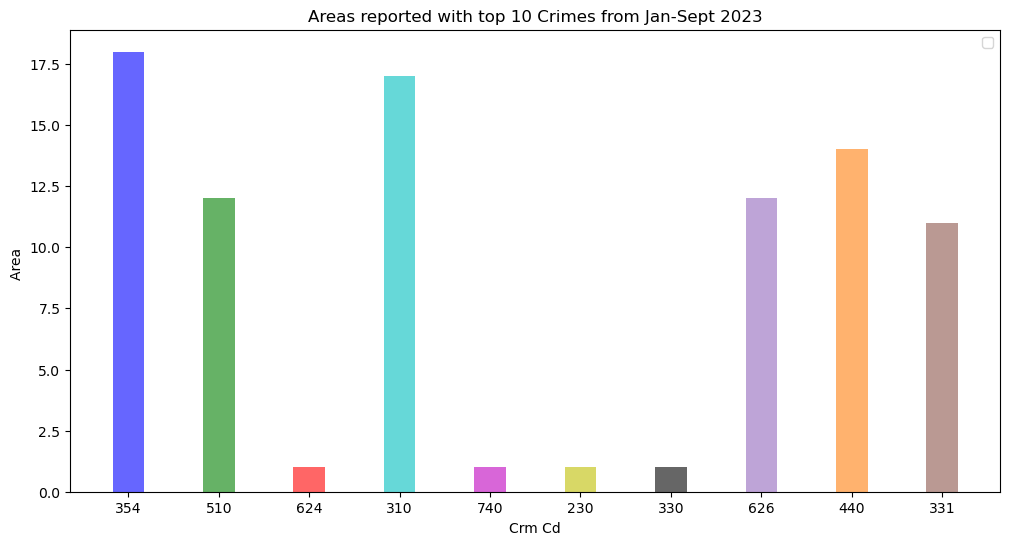

In [24]:
# Extracted mode values
mode = extracted_df.mode().iloc[0]  # Mode values are returned as a Series, so we use iloc[0] to get the first mode
print(mode)
x = np.arange(len(values))
#print(x)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'tab:brown']

plt.figure(figsize=(12, 6))

# Plot the mode values

plt.bar(x, mode,width=0.35, align='center', alpha=0.6, color=colors)                                        
plt.xticks(x, values)
plt.xlabel('Crm Cd')  
plt.ylabel('Area ')
plt.title('Areas reported with top 10 Crimes from Jan-Sept 2023')  
plt.legend()

plt.show()





Mode Counts:
SearchValue_354    679
SearchValue_510    456
SearchValue_624    456
SearchValue_310    270
SearchValue_740    252
SearchValue_230    304
SearchValue_330    609
SearchValue_626    208
SearchValue_440    281
SearchValue_331    235
dtype: int64
                 Top10 Crm Cd  Targeted Areas  Count
SearchValue_354           354            18.0    679
SearchValue_510           510            12.0    456
SearchValue_624           624             1.0    456
SearchValue_310           310            17.0    270
SearchValue_740           740             1.0    252
SearchValue_230           230             1.0    304
SearchValue_330           330             1.0    609
SearchValue_626           626            12.0    208
SearchValue_440           440            14.0    281
SearchValue_331           331            11.0    235


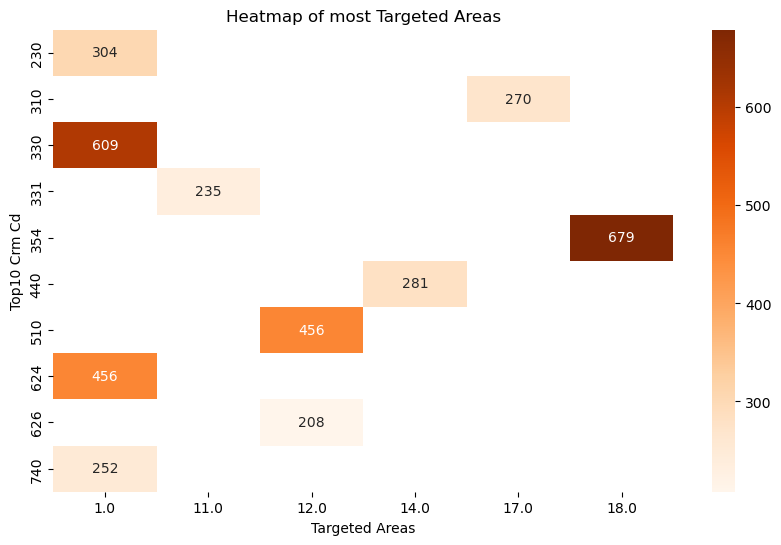

In [25]:
# Count the occurrences of mode values for 'Crm Cd'
mode_counts = extracted_df.apply(lambda x: (x == mode[x.name]).sum())
print("Mode Counts:")
print(mode_counts)

# Create a DataFrame for the mode counts
mode_counts_df = pd.DataFrame({'Top10 Crm Cd': values, 'Targeted Areas': mode ,'Count': mode_counts.values})
print(mode_counts_df)
# Use pivot_table to reshape the data for the heatmap
pivot_df = mode_counts_df.pivot_table(index='Top10 Crm Cd', columns='Targeted Areas', values='Count', aggfunc='first')

# Create a heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_df, annot=True, fmt='g', cmap='Oranges')
plt.title('Heatmap of most Targeted Areas')
plt.show()

# ANALYSIS AND VISUALIZATION OF CRIMES REPORTED AGAINST AGE GROUPS

In [26]:

values = [354, 510, 624, 310, 740, 230, 330, 626, 440, 331]

# Create a new DataFrame to store the extracted values
extracted_df1 = pd.DataFrame()

# Iterate through the values and extract corresponding values from 'Vict Age'
for value in values:
    extracted_values1 = d[d['Crm Cd'] == value]['Vict Age'].reset_index(drop=True)
    extracted_df1['SearchValue_' + str(value)] = extracted_values1

# Display the extracted values in the new DataFrame
print(extracted_df1)

      SearchValue_354  SearchValue_510  SearchValue_624  SearchValue_310  \
0                  19              0.0             20.0             54.0   
1                  22              0.0             81.0              0.0   
2                  21              0.0             14.0             30.0   
3                  27              0.0             46.0              0.0   
4                  26              0.0             41.0             39.0   
...               ...              ...              ...              ...   
6098               45              NaN              NaN              NaN   
6099               29              NaN              NaN              NaN   
6100               33              NaN              NaN              NaN   
6101               30              NaN              NaN              NaN   
6102               25              NaN              NaN              NaN   

      SearchValue_740  SearchValue_230  SearchValue_330  SearchValue_626  \
0          

In [27]:
#extract most repeated values for each search value
mode1 = extracted_df1.mode().iloc[0] # Mode values are returned as a Series, so we use iloc[0] to get the first mode
print(mode1)
# Create a DataFrame to store the counts of each of the mode values
mode_value_counts1 = extracted_df1.apply(lambda col: (col == mode1[col.name]).sum())
#print the count of each repeated values
print("\nCounts of Mode Values:")
print(mode_value_counts1)
# Create a DataFrame to store both the counts of repeated values & repeated values itself
mode_data = pd.DataFrame({'Top10 Crm Cd': values, 'Vict Age': mode1.values, 'Count': mode_value_counts1.values})
print(type("Top10 Crm Cd"))
print(" Most repeated Values and their Counts:")
print(mode_data)

SearchValue_354    32.0
SearchValue_510     0.0
SearchValue_624    28.0
SearchValue_310     0.0
SearchValue_740     0.0
SearchValue_230     0.0
SearchValue_330    29.0
SearchValue_626    30.0
SearchValue_440     0.0
SearchValue_331     0.0
Name: 0, dtype: float64

Counts of Mode Values:
SearchValue_354     267
SearchValue_510    5822
SearchValue_624     122
SearchValue_310    1056
SearchValue_740     829
SearchValue_230     125
SearchValue_330     140
SearchValue_626     115
SearchValue_440     345
SearchValue_331      93
dtype: int64
<class 'str'>
 Most repeated Values and their Counts:
   Top10 Crm Cd  Vict Age  Count
0           354      32.0    267
1           510       0.0   5822
2           624      28.0    122
3           310       0.0   1056
4           740       0.0    829
5           230       0.0    125
6           330      29.0    140
7           626      30.0    115
8           440       0.0    345
9           331       0.0     93


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


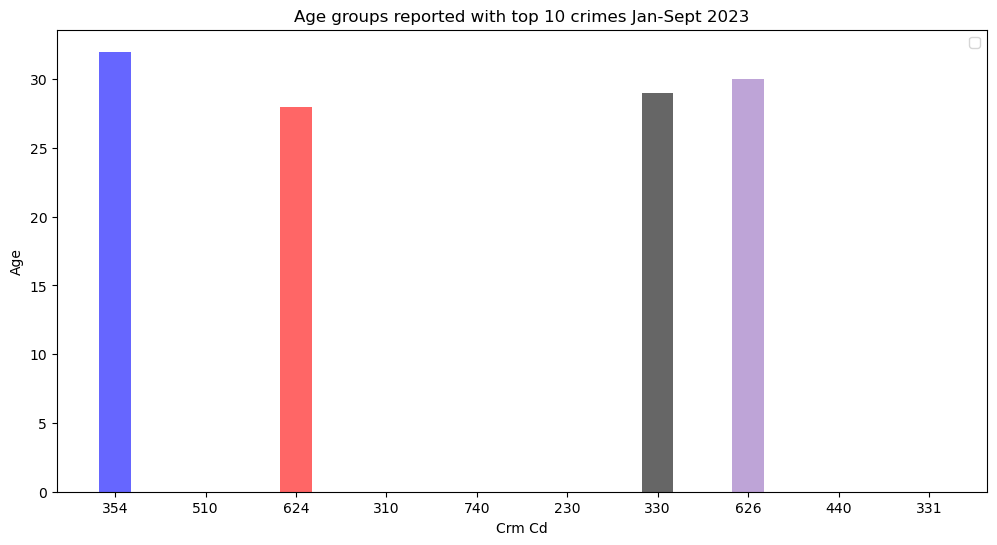

In [28]:

x = np.arange(len(values))


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'tab:brown']

plt.figure(figsize=(12, 6))

# Plot the mode values

plt.bar(x, mode1,width=0.35, align='center', alpha=0.6, color=colors)                                        
plt.xticks(x, values)
plt.xlabel('Crm Cd')  
plt.ylabel('Age')
plt.title('Age groups reported with top 10 crimes Jan-Sept 2023')
plt.legend()

plt.show()

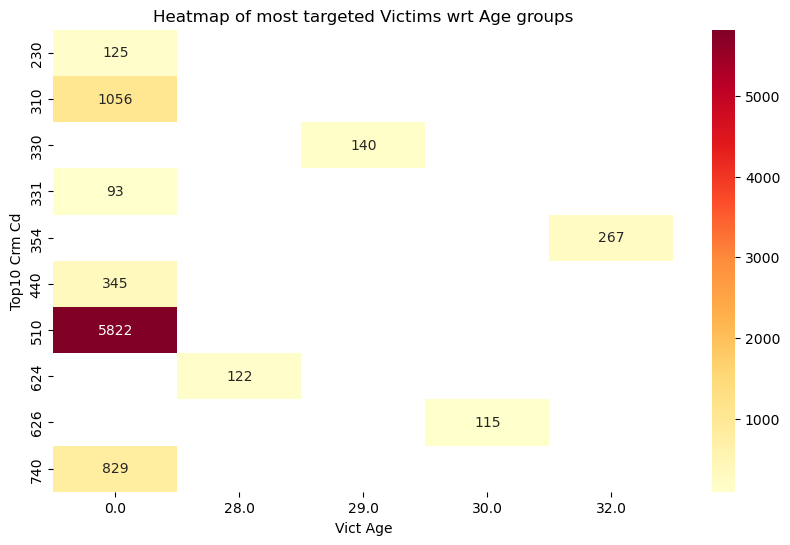

In [29]:
pivot_df1=mode_data.pivot_table(index='Top10 Crm Cd',columns='Vict Age',values="Count",aggfunc='first')
# Create a heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_df1, annot=True, fmt='g', cmap='YlOrRd')  # Use 'g' format for general (handles both integers and floats)
plt.title('Heatmap of most targeted Victims wrt Age groups')
plt.show()

# VICTIM GENDER ANALYSIS AND VISUALIZATION

In [30]:
# Filter rows where 'Vict Sex' is 'X'
unknown_value = d[d['Vict Sex'] == 'X']

# Extract the 'Crm Cd' values from the filtered DataFrame
matching_values = unknown_value['Crm Cd']

# Count the number of rows that match the filter
count_sex = len(unknown_value)
print("Count:", count_sex)

# Display specific columns from the filtered DataFrame
display(unknown_value.iloc[:, 5:15])





Count: 13487


,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd
1,West Valley,1075,1,510,VEHICLE - STOLEN,X,0,X,X,101
3,Harbor,519,1,510,VEHICLE - STOLEN,X,0,X,X,108
23,Newton,1303,1,210,ROBBERY,1309 1313 0342 0444 0302 0449 1218 1822,50,X,H,124
44,77th Street,1257,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),X,0,X,X,104
69,Devonshire,1782,2,354,THEFT OF IDENTITY,0935 1822 1501,0,X,X,203
...,...,...,...,...,...,...,...,...,...,...
58436,Wilshire,775,2,439,FALSE POLICE REPORT,1212 1309,22,X,X,101
58443,Wilshire,735,1,440,THEFT PLAIN - PETTY ($950 & UNDER),344,0,X,X,404
58446,Northeast,1146,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0906 1822 0450 1100 1407,0,X,X,101
58459,Hollywood,639,1,510,VEHICLE - STOLEN,X,0,X,X,101


In [31]:
# Define the values you want to compare
values = [354, 510, 624, 310, 740, 230, 330, 626, 440, 331]

# Create DataFrames
comparison_values = pd.DataFrame({'comp_values': values})
matching_sex = pd.DataFrame({'mv': matching_values})

# Display the DataFrames
print("Comparison Values:")
print(comparison_values)
print("\nMatching Sex:")
print(matching_sex)

# Check if values in 'mv' of matching_sex exist in 'comp_values' of comparison_values
matching_val = matching_sex[matching_sex['mv'].isin(comparison_values['comp_values'])]

# Display the matching values
print("\nMatching Values:")
print(matching_val)

Comparison Values:
   comp_values
0          354
1          510
2          624
3          310
4          740
5          230
6          330
7          626
8          440
9          331

Matching Sex:
        mv
1      510
3      510
23     210
44     420
69     354
...    ...
58436  439
58443  440
58446  230
58459  510
58462  341

[13487 rows x 1 columns]

Matching Values:
        mv
1      510
3      510
69     354
83     740
97     310
...    ...
58408  510
58420  510
58443  440
58446  230
58459  510

[7949 rows x 1 columns]


In [32]:
unique=matching_val['mv'].unique()
print(unique)
#counting how many times each values got repeated
frequency_unique_values = matching_val['mv'].value_counts()
print(frequency_unique_values )


[510 354 740 310 330 440 331 624 230 626]
mv
510    5810
310     805
740     657
440     286
330      98
354      77
331      77
230      75
624      48
626      16
Name: count, dtype: int64


   Value  Count
0    510   5810
1    310    805
2    740    657
3    440    286
4    330     98
5    354     77
6    331     77
7    230     75
8    624     48
9    626     16


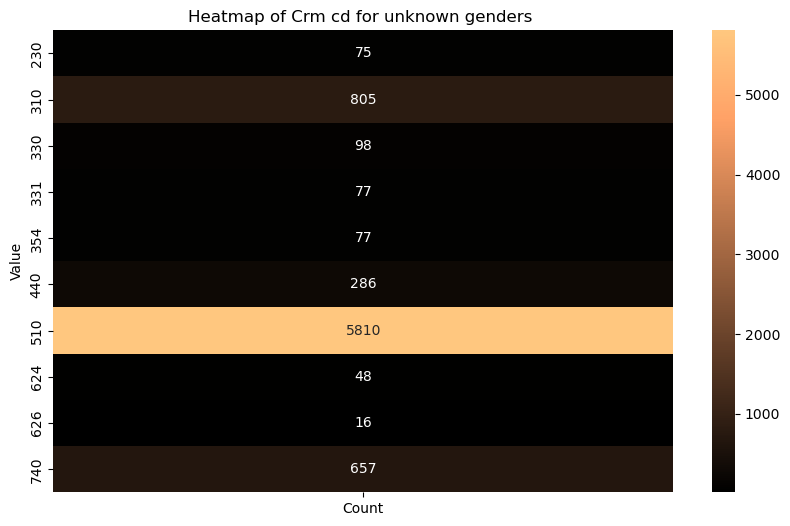

In [33]:
# Create a DataFrame from the frequency data
df_frequency = pd.DataFrame({'Value': frequency_unique_values.index, 'Count': frequency_unique_values.values})
print(df_frequency )
# Reshape the DataFrame for a heatmap using pivot_table and sum as the aggregation function
heatmap_data = df_frequency.pivot_table(index='Value', values='Count', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(heatmap_data, annot=True, fmt='d', cmap='copper')
plt.title('Heatmap of Crm cd for unknown genders ')
plt.show()

In [34]:

values = [354, 510, 624, 310, 740, 230, 330, 626, 440, 331]

# Create a new DataFrame to store the extracted values
extracted_df2 = pd.DataFrame()

# Iterate through the values and extract corresponding values from 'Vict Age'
for value in values:
    extracted_values2 = d[d['Crm Cd'] == value]['Vict Sex'].reset_index(drop=True)
    extracted_df2['SearchValue_' + str(value)] = extracted_values2

# Display the extracted values in the new DataFrame
print(extracted_df2)

     SearchValue_354 SearchValue_510 SearchValue_624 SearchValue_310  \
0                  F               X               M               M   
1                  F               X               M               X   
2                  M               M               F               M   
3                  F               X               F               X   
4                  F               X               F               F   
...              ...             ...             ...             ...   
6098               F             NaN             NaN             NaN   
6099               F             NaN             NaN             NaN   
6100               F             NaN             NaN             NaN   
6101               F             NaN             NaN             NaN   
6102               M             NaN             NaN             NaN   

     SearchValue_740 SearchValue_230 SearchValue_330 SearchValue_626  \
0                  X               F               F           

Mode Values:
SearchValue_354    F
SearchValue_510    X
SearchValue_624    M
SearchValue_310    M
SearchValue_740    M
SearchValue_230    M
SearchValue_330    M
SearchValue_626    F
SearchValue_440    M
SearchValue_331    M
Name: 0, dtype: object
Mode Counts:
SearchValue_354    4240
SearchValue_510    5810
SearchValue_624    2402
SearchValue_310    1638
SearchValue_740    1455
SearchValue_230    2237
SearchValue_330    1786
SearchValue_626    1999
SearchValue_440    1151
SearchValue_331    1367
dtype: int64


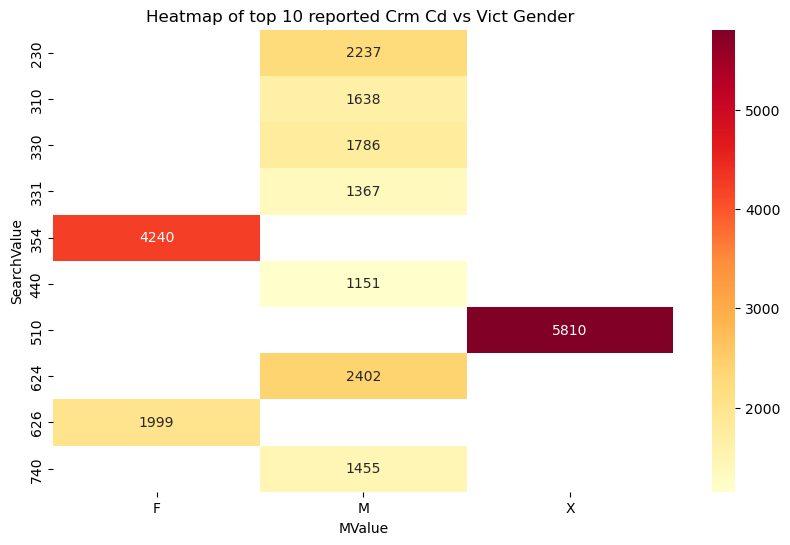

In [35]:
#extract most repeated values for each search value
mode2 = extracted_df2.mode().iloc[0]  # Mode values are returned as a Series, so we use iloc[0] to get the first mode
print("Mode Values:")
print(mode2)

# Count the occurrences of mode values for 'Crm Cd'
mode_counts2 = extracted_df2.apply(lambda col1: (col1 == mode2[col1.name]).sum())
print("Mode Counts:")
print(mode_counts2)

# Create a DataFrame for the mode counts
mode_counts_df2 = pd.DataFrame({'SearchValue': values, 'MValue': mode2.values, 'Count': mode_counts2.values})

# Use pivot_table to reshape the data for the heatmap
pivot_df2 = mode_counts_df2.pivot_table(index='SearchValue', columns='MValue', values='Count', aggfunc='first')

# Create a heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_df2, annot=True, fmt='g', cmap='YlOrRd')  # Use 'g' format for general (handles both integers and floats)
plt.title('Heatmap of top 10 reported Crm Cd vs Vict Gender ')
plt.show()

# FINDINGS AND SUMMARY 

"Theft of Identity" is the most frequently reported crime, with a total of 6,103 cases. In the southeastern region of Los Angeles, there were 679 reported instances of identity theft, predominantly involving individuals in the 32-year age group, with 267 cases reported. A significant portion of the victims in these cases were females.

In contrast, 5,822 cases of "Vehicle - Stolen" were reported with no available information regarding the age group or gender of the victims.